# Lab 6, part 2: neural network sample
by Domrachev Ivan, B20-Ro-01

In [12]:
from keras.datasets import mnist
from nn_from_scratch.optimizers import GradientDescent
from nn_from_scratch.examples.simple_nn import NeuralNetwork
from nn_from_scratch.nodes import ReLU, SoftMaxLoss
from nn_from_scratch.neurons import Linear

import numpy as np
from matplotlib import pyplot as plt

## Part 1. One layer NN

Finally, everything is ready to create Neural Network!

The sample of how it might look like is presented in `nn_from_scratch.examples.simple_nn.OneLayerNN`. Let's utilize it to learn preidctor for MNIST dataset.

In [23]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

n_input, n_output, batch_size = 28**2, 10, 2000

train_X = train_X.reshape(train_X.shape[0] // batch_size, batch_size, -1)
train_y_ohe = np.zeros((len(train_y), 10))
train_y_ohe[np.arange(len(train_y)), train_y] = 1
train_y_ohe = train_y_ohe.reshape((train_y.shape[0] // batch_size, batch_size, 10))

In [16]:
gds = GradientDescent(lr=0.5)
layers = [
    Linear((batch_size, n_input), (batch_size, n_output))
]
loss_fn = SoftMaxLoss((batch_size, n_output))
network = NeuralNetwork(
    n_input=n_input, 
    n_output=n_output, 
    batch_size=batch_size, 
    optimizer=gds,
    layers=layers,  
    loss_fn=loss_fn
)
network.fit(train_X, train_y_ohe, n_epochs=5)

Epoch 1, Loss: [132.6633355]
Epoch 2, Loss: [129.65116123]
Epoch 3, Loss: [128.70109283]
Epoch 4, Loss: [128.18114721]
Epoch 5, Loss: [127.84118271]


The loss during the train is decerasing, which indicates that our neural network is actually learning. Let's verify the results by considering the accuracy of its predictions:

In [17]:
def compute_accuracy(test_X: np.array, test_y: np.array, model) -> float:
    correct_predictions = 0
    total = 0

    for test_inputs, test_labels in zip(test_X, test_y):
        predicts = model.predict(test_inputs)
        pred_class = np.argmax(predicts, axis=1)

        correct_predictions += (pred_class == test_labels).sum()
        total += len(test_labels)

    return correct_predictions / total

In [18]:
test_X_batches = test_X.reshape((test_X.shape[0] // batch_size, batch_size, -1))
test_y_batches = test_y.reshape((test_y.shape[0] // batch_size, batch_size,))

acc = compute_accuracy(test_X_batches, test_y_batches, network)
print(f"Accuracy: {acc}")

Accuracy: 0.7684


The accuracy of $76.8%$ for the one-layer node is a great result! Let's plot the resulted pictures:

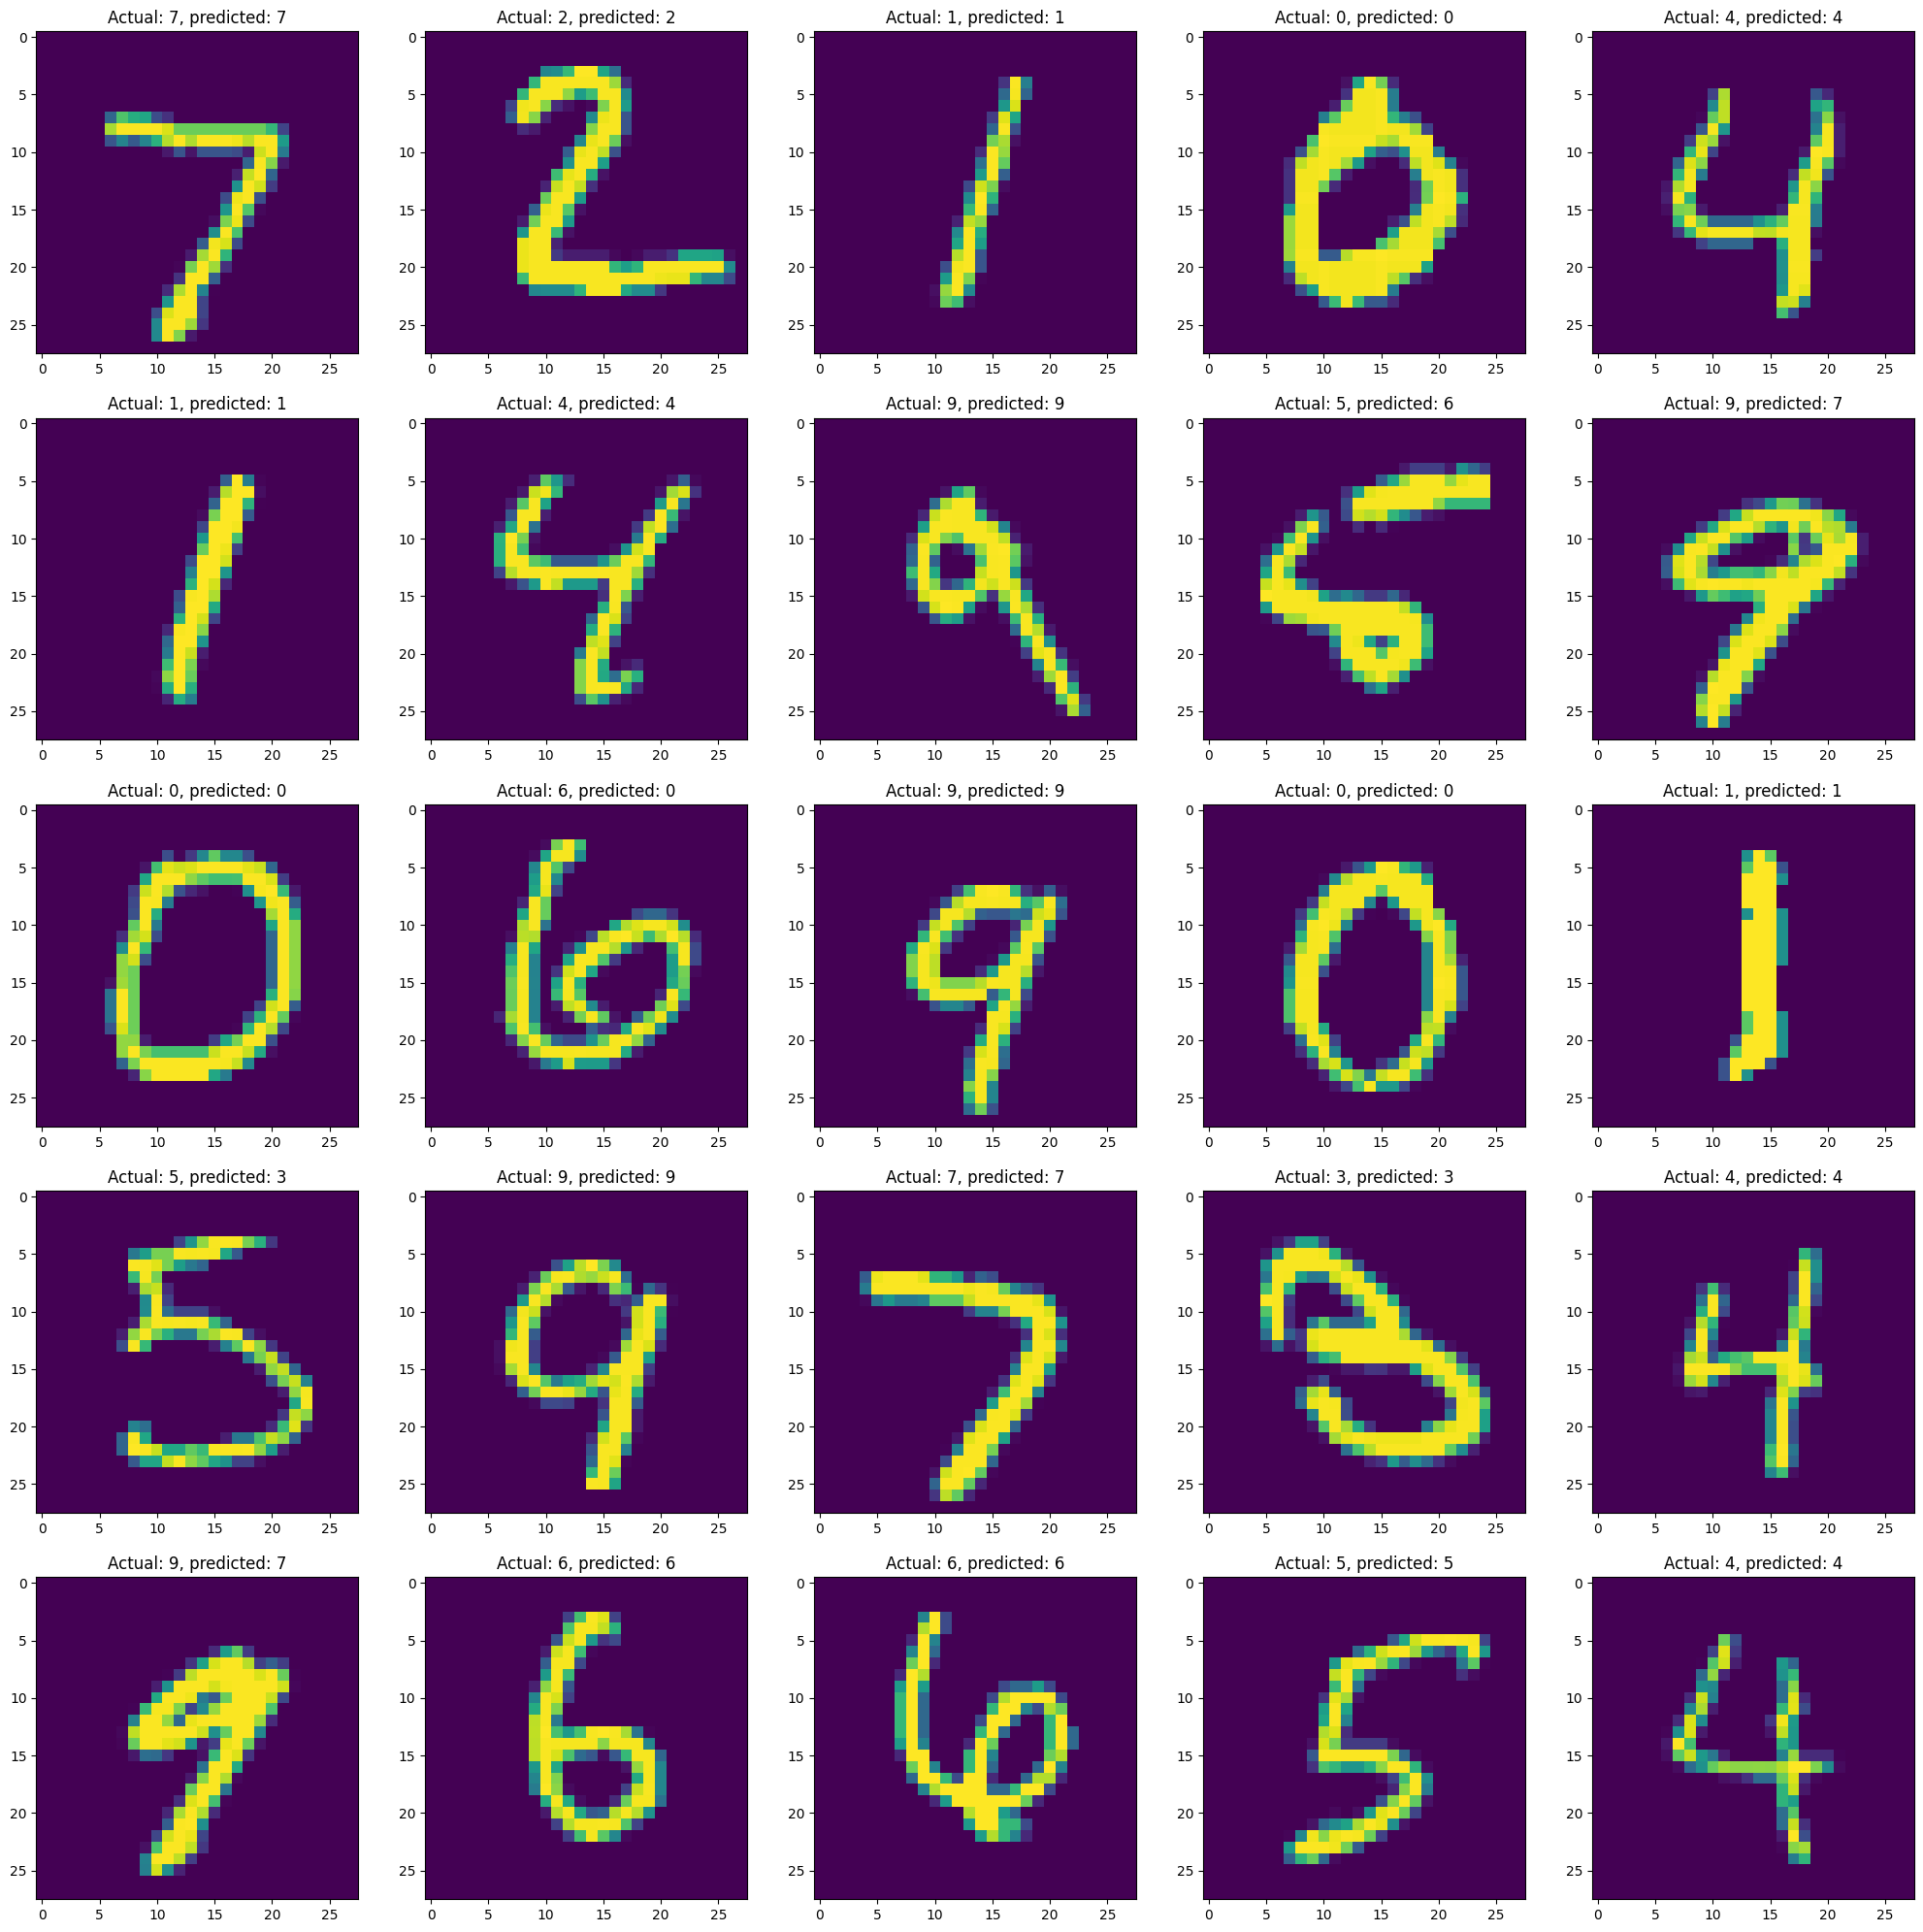

In [19]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.ravel()

plot_batch, plot_labels = test_X_batches[0], test_y_batches[0]
predicts = network.predict(plot_batch)[:25]
pred_class = np.argmax(predicts, axis=1)

for i in range(25):
    axs[i].imshow(test_X_batches[0][i].reshape(28, 28))
    axs[i].set_title(f"Actual: {plot_labels[i]}, predicted: {pred_class[i]}")

## Part 2. Two layers NN

Now let's compose a two-layers NN:

In [26]:
gds = GradientDescent(lr=0.1)
nn_layers = [
    Linear((batch_size, train_X.shape[2]), (batch_size, 64)),
    ReLU((batch_size, 64)),
    Linear((batch_size, 64), (batch_size, 10))
]
loss_fn = SoftMaxLoss((batch_size, n_output))
network = NeuralNetwork(
    n_input=784, 
    n_output=10, 
    batch_size=batch_size, 
    optimizer=gds, 
    layers = nn_layers,
    loss_fn=loss_fn
)
network.fit(train_X, train_y_ohe, n_epochs=5)

Epoch 1, Loss: [69.05689137]
Epoch 2, Loss: [69.04136329]
Epoch 3, Loss: [69.0382641]
Epoch 4, Loss: [69.03752538]
Epoch 5, Loss: [69.03765085]


array([69.03765085])

I've tried many different learning rates, but nothing helped: the loss did not decrease at all! Let's evaluate an accuracy:

In [27]:
acc = compute_accuracy(test_X_batches, test_y_batches, network)
print(f"Accuracy: {acc}")

Accuracy: 0.1135


Somehow, the accuracy of two-layer network is much lower that of one-layer. The possible problem might be a ReLU activation function, which fails to propogate the result back effectively. Another possible reason might be lack of normalization.